In [18]:
import json
import yaml
import sys
import re
import csv
import numpy as np
import os

sys.path.append('../configs/')

from configs import update_configs, get_configs

Set the configuration files paths.

In [19]:
dataset_cfg_file = "../configs/dataset.yaml"
model_cfg_file = "../configs/model.yaml"
train_cfg_file = "../configs/train.yaml"
labels_cfg_file = "../configs/labels.yaml"

Get project configuration.

In [20]:
cfg = get_configs()
update_configs(cfg, model_cfg_file, dataset_cfg_file, train_cfg_file)

Load the dataset and print one data record.

In [21]:
with open(cfg.DATASET.TRAIN_FILE) as f:
    d = json.load(f)

# Example of one data record
key = list(d)[4]
values = d[key]

print(values)

{'question': 'Does the horse look tired?', 'image_id': '464980', 'image_name': 'COCO_train2014_000000464980.jpg', 'answers': ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']}


# Data Analysis

PLot the most common 15 words that appear in the questions.

Number of words: 4475
The most coomon 15 words: {'is': 21475, 'the': 13300, 'this': 12217, 'what': 11337, 'a': 5332, 'does': 4691, 'of': 4436, 'sport': 2136, 'it': 2086, 'have': 2076, 'kind': 2020, 'man': 2003, 'in': 1972, 'room': 1926, 'are': 1916}


<BarContainer object of 15 artists>

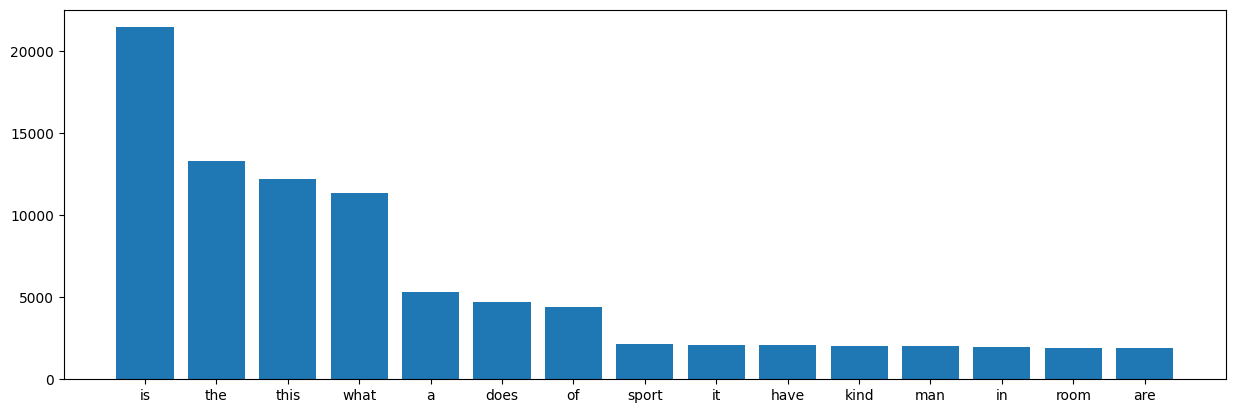

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

words_list = []
for keys, values in d.items():
    question = values['question']
    question = re.sub(r'[^\w\s]', '', question.lower())
    words = question.split()
    words_list.extend(words)

word_freq = Counter(words_list)
most_common_words = dict(word_freq.most_common(15))

print('Number of words:',len(set(words_list)))
print('The most coomon 15 words:',most_common_words)

plt.figure().set_figwidth(15)
plt.bar(most_common_words.keys(),most_common_words.values())

Find the minimum and maximum number of words in a question and plot the most common 15 words used in the questions.

Maximum number of words in a question: 22
Minimum number of words in a question: 3
Most common numbers of words in a question: {4: 8015, 5: 7631, 6: 5365, 7: 2417, 8: 1963, 3: 1684, 9: 917, 10: 477, 11: 233, 12: 152, 13: 63, 14: 35, 15: 24, 16: 9, 19: 6}


<BarContainer object of 15 artists>

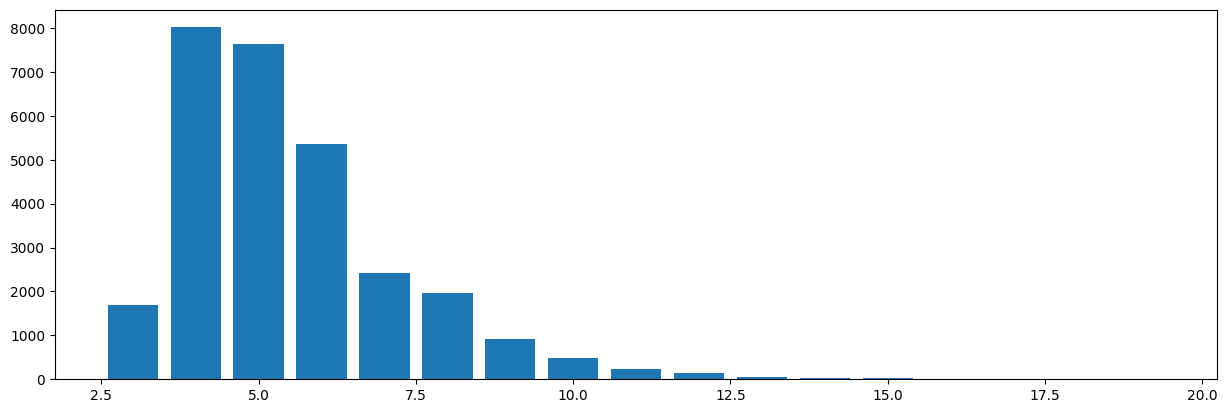

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

nr_words_list = []
for keys, values in d.items():
    question = values['question']
    question = re.sub(r'[^\w\s]', '', question.lower())
    words = question.split()
    nr_words_list.append(len(words))

nr_words_freq = Counter(nr_words_list)
most_common_nr_words = dict(nr_words_freq.most_common(15))

print('Maximum number of words in a question:', max(nr_words_freq))
print('Minimum number of words in a question:', min(nr_words_freq))
print('Most common numbers of words in a question:', most_common_nr_words)

plt.figure().set_figwidth(15)
plt.bar(most_common_nr_words.keys(),most_common_nr_words.values())

Plot the most common 15 answers in the dataset.

Number of unique answers: 2323
Most common 15 answers: {'yes': 93097, 'no': 68955, 'tennis': 8585, 'baseball': 8257, 'bathroom': 6301, 'kitchen': 5198, 'skiing': 4368, 'skateboarding': 4142, 'surfing': 3385, 'frisbee': 2861, 'soccer': 2494, 'pizza': 2345, 'snowboarding': 2158, 'living room': 2002, 'giraffe': 1725}


<BarContainer object of 15 artists>

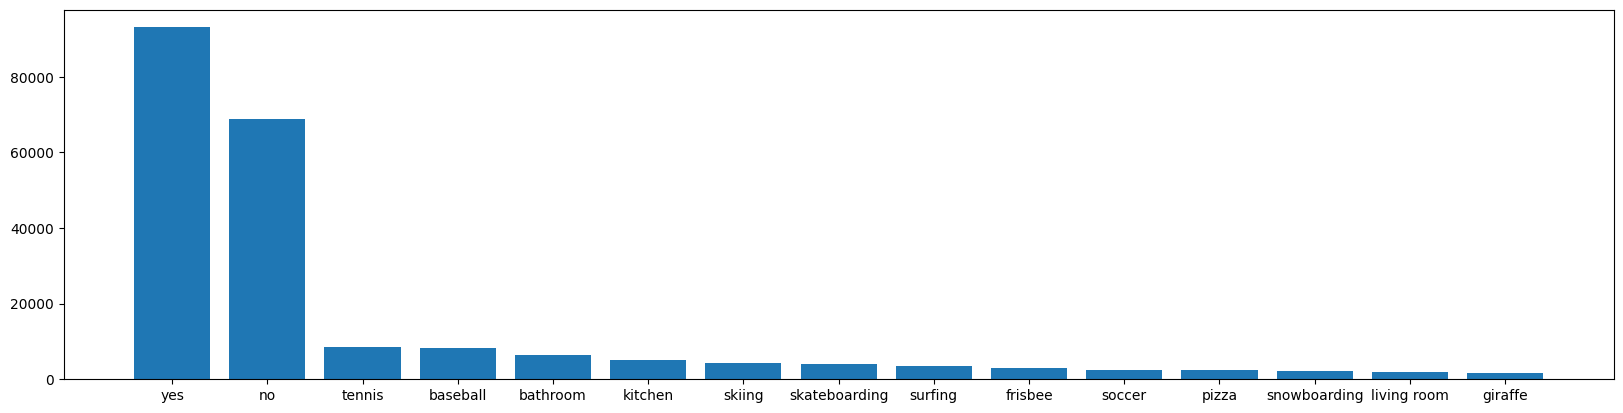

In [24]:
from collections import Counter
import matplotlib.pyplot as plt

answers_list = []
for keys, values in d.items():
    answers = values['answers']
    answers_list.extend(answers)

answers_freq = Counter(answers_list)
most_common_answers = dict(answers_freq.most_common(15))

unique_answers = 0
for key, value in answers_freq.items():
    if value == 1:
        unique_answers = unique_answers + 1 

print('Number of unique answers:', unique_answers)
print('Most common 15 answers:', most_common_answers)

plt.figure().set_figwidth(20)
plt.bar(most_common_answers.keys(),most_common_answers.values())

Determine the most frequent 15 images in the dataset and their corresponding questions.

In [25]:
from collections import Counter

image_ids_list = []
for keys, values in d.items():
    image_id = values['image_id']
    image_ids_list.append(image_id)

image_ids_freq = Counter(image_ids_list)
most_common_image_ids = dict(image_ids_freq.most_common(5))

print('Most common 5 image ids:', most_common_image_ids)

questions = []
for image_id in most_common_image_ids.keys():
    for keys, values in d.items():
        if values['image_id'] == image_id:
            questions.append({image_id: values['question']})

print('The questions for the most common 5 image ids:', questions)

Most common 5 image ids: {'484714': 14, '430615': 8, '258155': 7, '462395': 6, '217571': 6}
The questions for the most common 5 image ids: [{'484714': 'What is the guy doing?'}, {'484714': 'What is this person riding?'}, {'484714': 'What is he on?'}, {'484714': 'What sport is this?'}, {'484714': 'What is the boy doing?'}, {'484714': 'Is it winter?'}, {'484714': 'What is this person doing?'}, {'484714': 'Is the water calm?'}, {'484714': 'Sunny or overcast?'}, {'484714': 'What sport is the man playing?'}, {'484714': 'What is this guy doing?'}, {'484714': 'What is the person doing?'}, {'484714': 'What sport is shown here?'}, {'484714': 'What is he doing?'}, {'430615': 'Is it daytime?'}, {'430615': 'What is this person doing?'}, {'430615': 'Is this a skate park?'}, {'430615': 'Is it night time?'}, {'430615': 'What season is it?'}, {'430615': 'Sunny or overcast?'}, {'430615': 'What type of vehicle is this?'}, {'430615': 'Is it summer?'}, {'258155': 'What room of the house is this?'}, {'2581

In [26]:
data = np.load(os.path.join(cfg.DATASET.TRAIN_VAL_IMG_EMBEDDINGS_FOLDER, '30.npz'))
print(data['feat'].shape)

(36, 2048)
